In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generating some random data where x is input variable and y is target variable
np.random.seed(0)  # it used to stop the randomness if we run this code again and again
x = np.random.normal(0,1.5,1000)
y =  (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-2, 2, 1000)
raw_data = pd.DataFrame([x,y]).T
raw_data.columns = ['x','y']
raw_data.head(10)

,x,y
0,2.646079,15.377223
1,0.600236,0.253358
2,1.468107,0.892842
3,3.361340,28.497259
4,2.801337,17.295326
5,-1.465917,-1.023191
6,1.425133,2.559774
7,-0.227036,-5.590461
8,-0.154828,-2.076532
9,0.615898,-1.025788


In [3]:
# data Preprocessing 
train_data = raw_data.iloc[:750,:]
train_data_x = raw_data.iloc[:750,0]
train_data_y = raw_data.iloc[:750,1]

test_data  = raw_data.iloc[750:,:]
test_data_x = raw_data.iloc[750:,0]
test_data_y =raw_data.iloc[750:,1]


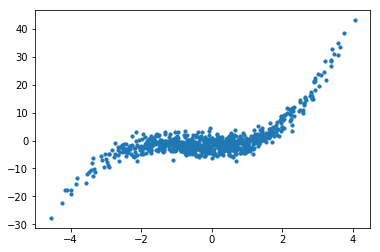

In [4]:
plt.scatter(train_data['x'] , train_data['y'] , s = 10)
plt.show()

### This function create more features

In [5]:
def poly_Feature(degree , data):
    ''' Pass data as DataFrame '''
    new_data = data.copy()
    p = pd.DataFrame()
    from itertools import combinations_with_replacement 
    z = []
    for i in range(1,degree + 1):
        t = list(combinations_with_replacement(new_data.columns , i ))
        for j in t:
            x = 1
            st = ''
            for k in j:
                st+=k
                x *= new_data[k]
            p[st] = x
    return p

poly_Feature(3,pd.DataFrame(train_data_x) ).head()  # we are passing our data for increase features with degree

,x,xx,xxx
0,2.646079,7.001732,18.527131
1,0.600236,0.360283,0.216255
2,1.468107,2.155338,3.164267
3,3.361340,11.298605,37.978451
4,2.801337,7.847489,21.983461


$$
h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}
$$

$$
h(x)=\sum_{i=0}^{n} \theta_{i} x_{i}=\theta^{T} x
$$

**The Cost function is:** 
$$
J(\theta)=\frac{1}{2} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}
$$

Now we have to minimize this cost function

for gradient decent we have a formula :

$$
\theta_{j} :=\theta_{j}-\alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

$$
\begin{aligned} \frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2}\left(h_{\theta}(x)-y\right)^{2} \\ &=2 \cdot \frac{1}{2}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}(x)-y\right) \\ &=\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{n} \theta_{i} x_{i}-y\right) \\ &=\left(h_{\theta}(x)-y\right) x_{j} \end{aligned}
$$

# Matrix calculation

The polynomial regression model

$$
y_{i}=\beta_{0}+\beta_{1} x_{i}+\beta_{2} x_{i}^{2}+\cdots+\beta_{m} x_{i}^{m}+\varepsilon_{i}(i=1,2, \ldots, n)
$$

$$
\left[ \begin{array}{c}{y_{1}} \\ {y_{2}} \\ {y_{3}} \\ {\vdots} \\ {y_{n}}\end{array}\right]=\left[ \begin{array}{ccccc}{1} & {x_{1}} & {x_{1}^{2}} & {\ldots} & {x_{1}^{m}} \\ {1} & {x_{2}} & {x_{2}^{2}} & {\ldots} & {x_{2}^{m}} \\ {1} & {x_{3}} & {x_{3}^{2}} & {\ldots} & {x_{3}^{m}} \\ {\vdots} & {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {1} & {x_{n}} & {x_{n}^{2}} & {\ldots} & {x_{n}^{m}}\end{array}\right] \left[ \begin{array}{c}{\beta_{0}} \\ {\beta_{1}} \\ {\beta_{2}} \\ {\vdots} \\ {\beta_{m}}\end{array}\right]+\left[ \begin{array}{c}{\varepsilon_{1}} \\ {\varepsilon_{2}} \\ {\varepsilon_{3}} \\ {\vdots} \\ {\varepsilon_{n}}\end{array}\right]
$$

which when using pure matrix notation is written as

$$
\vec{y}=\mathbf{X} \vec{\beta}+\vec{\varepsilon}
$$

The vector of estimated polynomial regression coefficients (using ordinary least squares estimation) is

$$
\widehat{\vec{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \vec{y}
$$

assuming m < n which is required for the matrix to be invertible; then since {\displaystyle \mathbf {X} } \mathbf {X}  is a Vandermonde matrix, the invertibility condition is guaranteed to hold if all the {\displaystyle x_{i}} x_{i} values are distinct. This is the unique least-squares solution.

In [6]:
train_data = raw_data.iloc[:750,:]
train_data_x = raw_data.iloc[:750,0]
train_data_y = raw_data.iloc[:750,1]

test_data  = raw_data.iloc[750:,:]
test_data_x = raw_data.iloc[750:,0]
test_data_y =raw_data.iloc[750:,1]
test_data_y = np.array(test_data_y).reshape(len(test_data_y) , 1)


train_data_x = poly_Feature(3,pd.DataFrame(train_data_x))
train_data_x.head()



,x,xx,xxx
0,2.646079,7.001732,18.527131
1,0.600236,0.360283,0.216255
2,1.468107,2.155338,3.164267
3,3.361340,11.298605,37.978451
4,2.801337,7.847489,21.983461


## Now, we apply Linear regression on this data. and try to minimize the least square as a cost function. We expand the same feature by 3 degree. Now we have 3 different features and we have to calculate 3 coefficents and 1 intercept


In [7]:
it = []
ft = []
def y_cap(theta0 , theta , data):
        return theta0 + np.dot(np.array(data),theta)
    
def gradient_decent():
    global train_data_y , it , ft
    initial_theta0 = np.random.rand(1,1)
    initial_theta = np.random.rand(train_data_x.shape[1],1)
    alpha = 0.01
    epsilon = 0.001

    train_data_y = np.array(train_data_y).reshape(len(train_data_y),1)

    def y_cap(theta0 , theta , data):
        return theta0 + np.dot(np.array(data),theta)
    it = []
    ft = []
    i = 0
    while(True):
        del_theta0 = (1/train_data_x.shape[0]) *  np.sum(y_cap(initial_theta0 ,initial_theta , train_data_x) - train_data_y)
        del_theta = (1/train_data_x.shape[0]) * np.dot((train_data_x).T , (y_cap(initial_theta0 ,initial_theta, train_data_x) 
                                                                       - (train_data_y)))

        final_theta0 = initial_theta0 - alpha * del_theta0
        final_theta  = initial_theta  - alpha * del_theta

        initial_cost =  (1/2) * np.sum((y_cap(initial_theta0 , initial_theta , train_data_x) - (train_data_y)) **2 )
        final_cost  =  (1/2) * np.sum((y_cap(final_theta0 , final_theta, train_data_x) - (train_data_y)) **2 )

        if(abs(initial_cost - final_cost)) < epsilon:
            break
        
        print("initial cost {} final cost {}".format(initial_cost , final_cost))
        it.append(i)
        ft.append(final_cost)
        i+=1
        initial_theta0 = final_theta0
        initial_theta = final_theta
        
    return final_theta0 , final_theta
final_theta0 , final_theta = gradient_decent()

initial cost 5013.72433969527 final cost 4062.9485412859804
initial cost 4062.9485412859804 final cost 3615.5943280502993
initial cost 3615.5943280502993 final cost 3358.1438638665663
initial cost 3358.1438638665663 final cost 3187.391104713781
initial cost 3187.391104713781 final cost 3064.7509107753876
initial cost 3064.7509107753876 final cost 2972.8113507116714
initial cost 2972.8113507116714 final cost 2902.012107350579
initial cost 2902.012107350579 final cost 2846.299222011413
initial cost 2846.299222011413 final cost 2801.526505750304
initial cost 2801.526505750304 final cost 2764.7489769306985
initial cost 2764.7489769306985 final cost 2733.8419297872297
initial cost 2733.8419297872297 final cost 2707.262457757352
initial cost 2707.262457757352 final cost 2683.8870693073613
initial cost 2683.8870693073613 final cost 2662.8966597708713
initial cost 2662.8966597708713 final cost 2643.693633407925
initial cost 2643.693633407925 final cost 2625.8417698020203
initial cost 2625.8417

initial cost 1442.894044761068 final cost 1442.783097710073
initial cost 1442.783097710073 final cost 1442.6734951398944
initial cost 1442.6734951398944 final cost 1442.5652207305266
initial cost 1442.5652207305266 final cost 1442.4582583604956
initial cost 1442.4582583604956 final cost 1442.352592104437
initial cost 1442.352592104437 final cost 1442.2482062307054
initial cost 1442.2482062307054 final cost 1442.145085199009
initial cost 1442.145085199009 final cost 1442.0432136580773
initial cost 1442.0432136580773 final cost 1441.9425764433554
initial cost 1441.9425764433554 final cost 1441.8431585747257
initial cost 1441.8431585747257 final cost 1441.7449452542596
initial cost 1441.7449452542596 final cost 1441.6479218639943
initial cost 1441.6479218639943 final cost 1441.5520739637407
initial cost 1441.5520739637407 final cost 1441.4573872889127
initial cost 1441.4573872889127 final cost 1441.363847748387
initial cost 1441.363847748387 final cost 1441.271441422389
initial cost 1441.

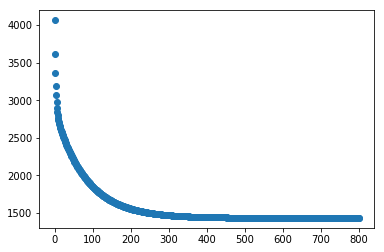

In [8]:
plt.scatter(it , ft) # cost function plot

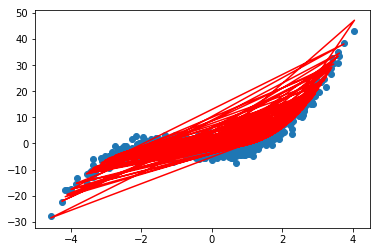

In [9]:
predict_y = y_cap(final_theta0 , final_theta , train_data_x)
plt.scatter(train_data['x'] , train_data['y'])
plt.plot(train_data['x'] ,predict_y , c='r')


## This graph is good but the values we are plotting is not shorted. So we need to sort the values of  'y_predict'  with 'x'

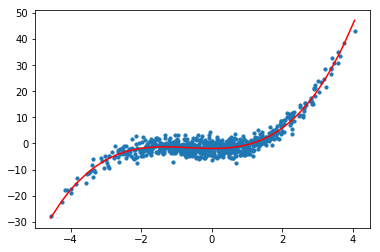

In [10]:
predict_y = y_cap(final_theta0 , final_theta , train_data_x)

s = sorted(zip(train_data['x'] , predict_y) )
new_x , new_y = zip(*s)

# this sort the values according to 'x'
plt.scatter(train_data['x'] , train_data['y'] , s=10)
plt.plot(new_x ,new_y , c='r')


In [11]:
def rs_quare(true_data , predict_data):
    #deno = np.sum(( train_data_y - np.mean(train_data_y) )** 2)
    #num = np.sum(( y_cap(final_theta0 ,final_theta, train_data_x) - np.mean(train_data_y)) ** 2)
    #r2 = num / deno
    rss = np.sum(( true_data  - predict_data )** 2)
    tss = np.sum(( true_data - np.mean(true_data) )** 2)
    r2 = ( (tss - rss) / tss)
    return r2

def rs_error(true_data , predict_data):
    rss = np.sqrt(np.sum(( true_data  - predict_data )** 2) / (true_data.shape[0] - 2) )
    return rss

def mse(true_data , predict_data):
    return  np.sum(( true_data  - predict_data )** 2) / true_data.shape[0]
    

## Now we test with Testing Data.  We are getting our coefficents from trained data now we calculate y_cap i.e equation of line of 3 degree polynomial  by passing the testing data with coeffients which we get from trained data

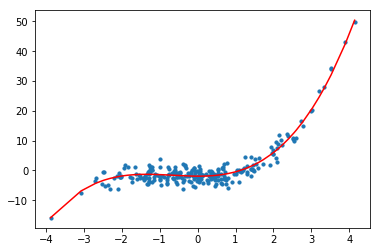

In [12]:
t_d =  poly_Feature( 3 , pd.DataFrame(test_data['x']))

predicted_y = y_cap(final_theta0 , final_theta , t_d)  

s = sorted(zip(test_data['x'] , predicted_y))
new_x , new_y = zip(*s)

plt.scatter(test_data['x'] , test_data['y'] , s=10)
plt.plot(new_x ,new_y , c='r')


In [13]:
print("Testing R2 Score : ",rs_quare(test_data_y , predicted_y))
print('Testing Residual Standard Error : ',rs_error(test_data_y , predicted_y))
print("Testing Mean square error :", mse(test_data_y , predicted_y))

print("\nTraining R2 Score : ",rs_quare(train_data_y , predict_y))
print('Training Residual Standard Error : ',rs_error(train_data_y , predict_y))
print("Training Mean square error :", mse(train_data_y , predict_y))

Testing R2 Score :  0.9305919476782984
Testing Residual Standard Error :  1.8840256837507436
Testing Mean square error : 3.5211563548161973

Training R2 Score :  0.9088197746991521
Training Residual Standard Error :  1.9579865455088803
Training Mean square error : 3.8234880822274153


# Now we check our answers with sklearn library

Training R2 Score :  0.9088249344033336
Training Mean Squared Error :  3.823271718784786


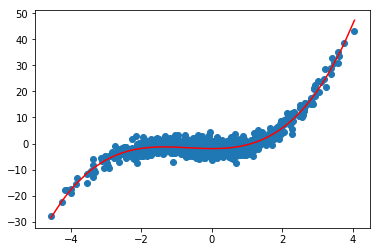

In [15]:
# it takes only 10 lines by using library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.metrics as m

poly = PolynomialFeatures( degree = 3 )
new_training_data = poly.fit_transform(np.array(train_data['x']).reshape(750,1))

model = LinearRegression()
model.fit(new_training_data , train_data['y'])
y_poly_pred = model.predict(new_training_data)

ss = sorted(zip(train_data['x'] , y_poly_pred))
new_x , new_y = zip(*ss)
plt.scatter(train_data['x'] , train_data['y'])
plt.plot(new_x,new_y , c = 'r')

print("Training R2 Score : " , m.r2_score(train_data['y'] , y_poly_pred))
print("Training Mean Squared Error : " , m.mean_squared_error(train_data['y'] , y_poly_pred))